In [1]:
import tensorflow as tf


# gpu 설정하는 부분

# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#       tf.config.experimental.set_virtual_device_configuration(
#           gpus[0],
#           [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 6)])
#       logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#       print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#       print(e)

C:\anaconda3\envs\eui\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\anaconda3\envs\eui\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\anaconda3\envs\eui\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


1 Physical GPUs, 1 Logical GPUs


In [2]:
import os
test_images = 'images/test/'
IMAGE_PATHS = []

# test 폴더에는 jpg와 xml파일이 있는데 jpg의 경로만 가져옴
for file_path in os.listdir(test_images):
    if os.path.splitext(file_path)[1] == '.jpg':
        IMAGE_PATHS.append(os.path.join(test_images, file_path))

In [3]:
PATH_TO_MODEL_DIR = 'exported-models/my_model/'

In [4]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 29.2273690700531 seconds


In [5]:
PATH_TO_LABELS = 'annotations/label_map.pbtxt'

In [6]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

In [7]:
%matplotlib inline

Running inference for images/test/467.jpg... Done
Running inference for images/test/468.jpg... Done
Running inference for images/test/469.jpg... Done
Running inference for images/test/470.jpg... Done
Running inference for images/test/471.jpg... Done
Running inference for images/test/472.jpg... Done
Running inference for images/test/473.jpg... Done
Running inference for images/test/474.jpg... Done
Running inference for images/test/475.jpg... Done
Running inference for images/test/476.jpg... Done
Running inference for images/test/477.jpg... Done
Running inference for images/test/478.jpg... Done
Running inference for images/test/479.jpg... Done
Running inference for images/test/480.jpg... Done
Running inference for images/test/481.jpg... Done
Running inference for images/test/482.jpg... Done
Running inference for images/test/483.jpg... Done
Running inference for images/test/484.jpg... Done
Running inference for images/test/485.jpg... Done
Running inference for images/test/486.jpg... Done


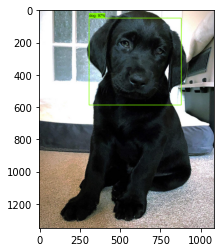

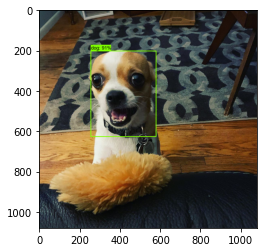

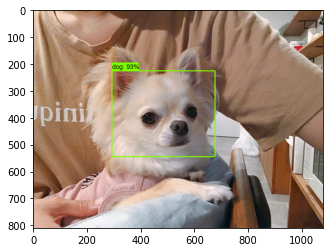

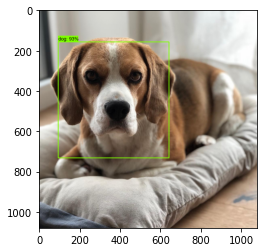

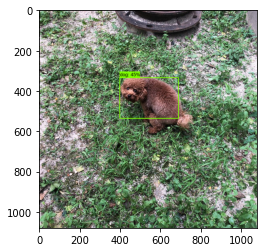

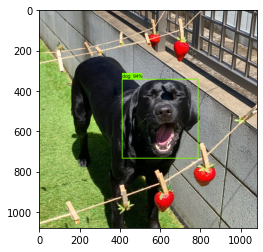

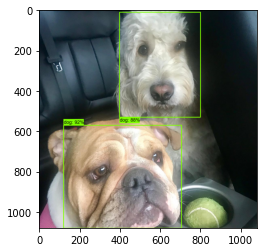

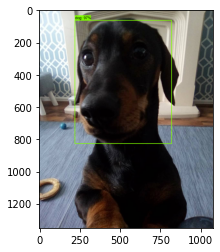

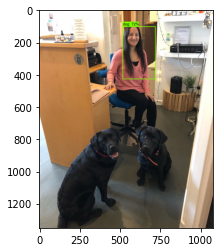

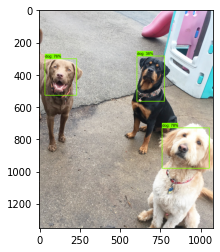

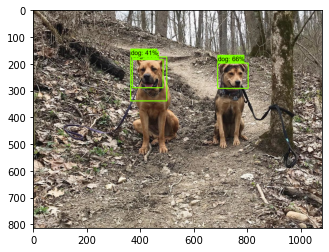

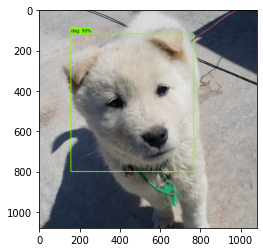

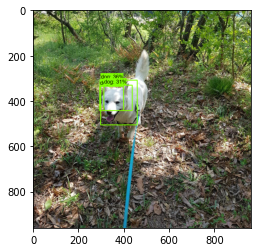

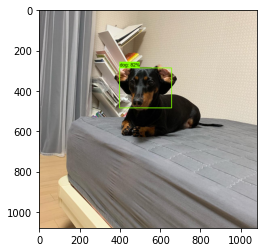

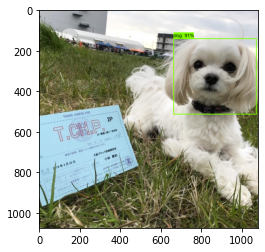

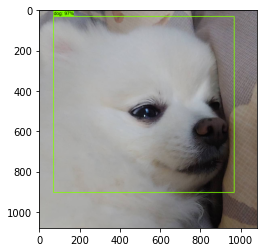

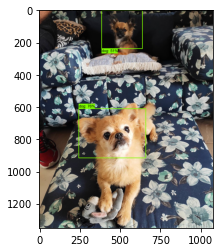

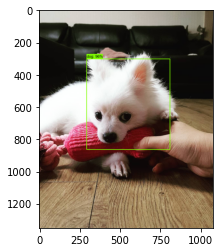

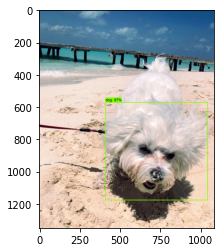

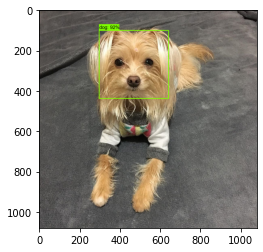

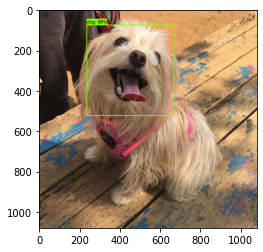

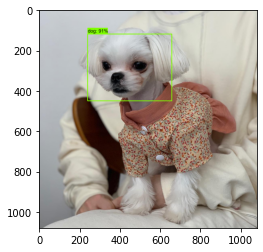

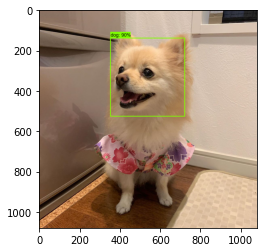

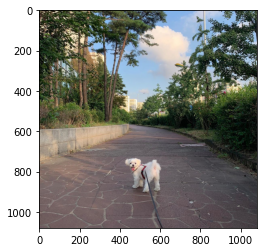

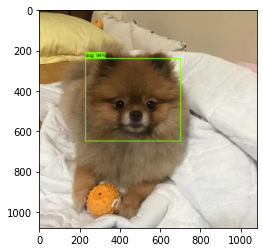

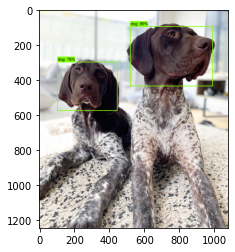

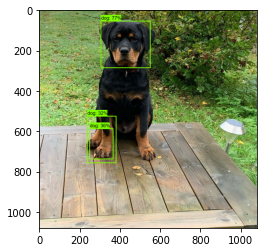

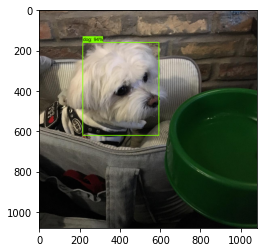

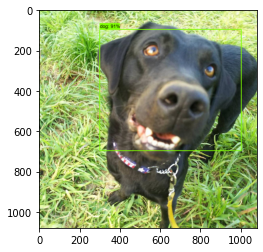

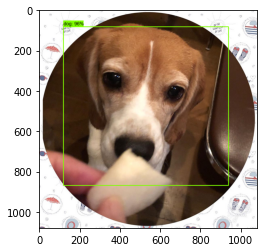

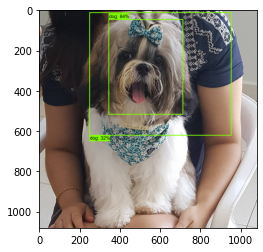

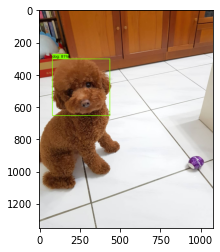

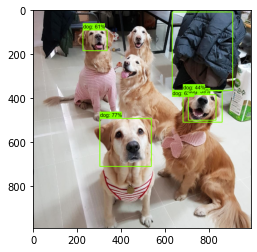

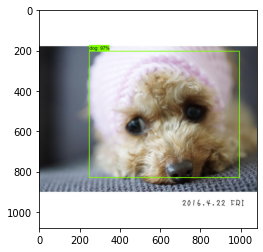

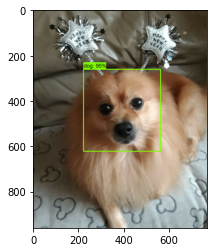

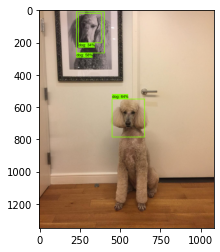

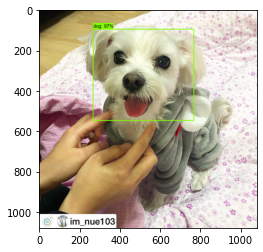

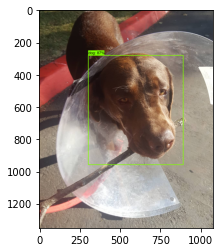

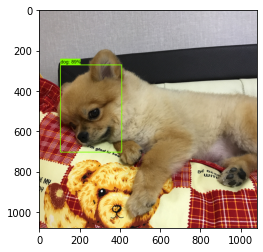

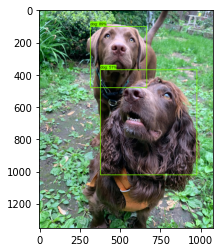

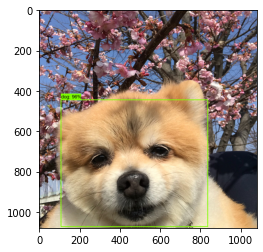

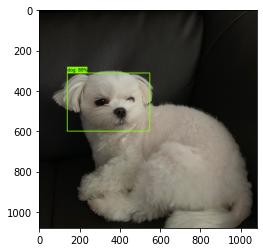

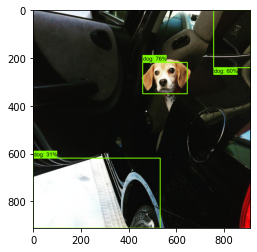

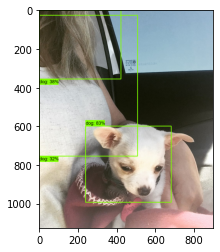

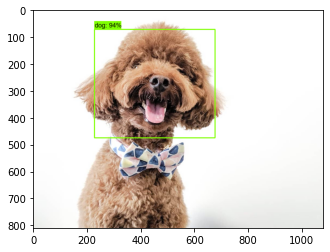

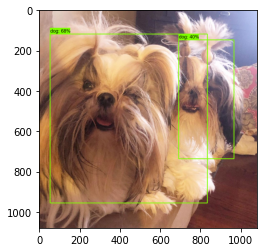

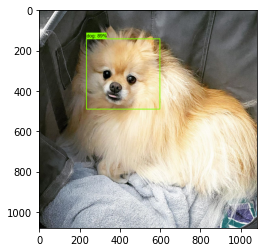

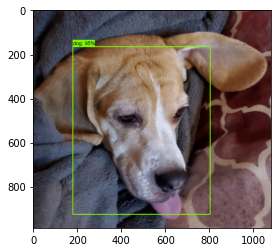

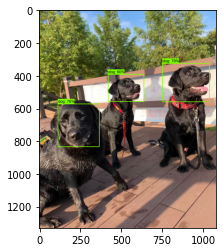

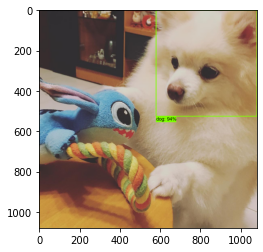

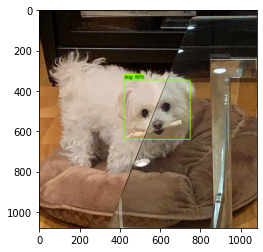

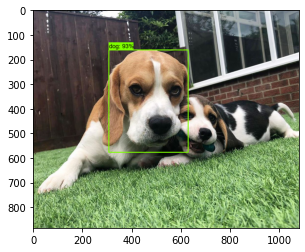

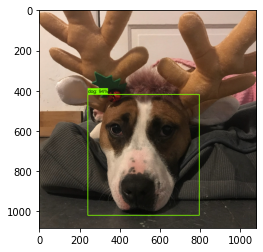

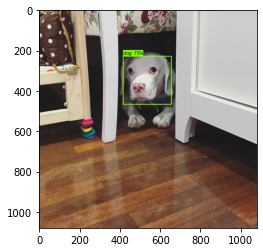

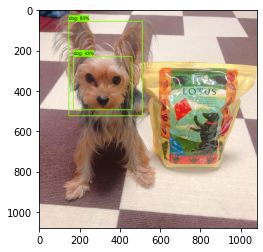

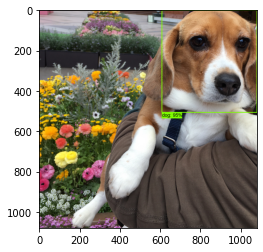

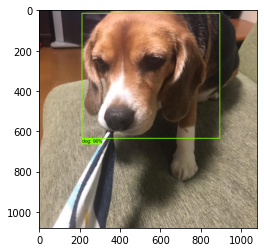

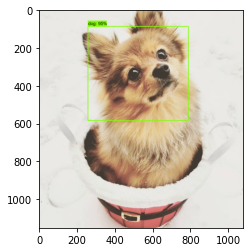

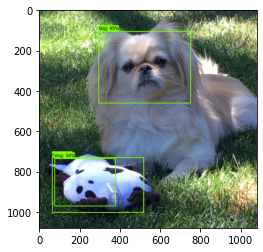

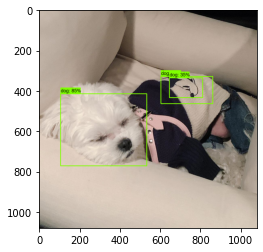

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)
    
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=300,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2